In [17]:
#Import basic frameworks
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Import learning models
from sklearn.tree import DecisionTreeClassifier

#Frameworks for SVC
from sklearn.preprocessing import StandardScaler

#Import model selection
from sklearn import model_selection
from sklearn.model_selection import train_test_split

# Import measurement metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [15]:
#Read CSV file
data = pd.read_csv(r"C:\Users\cvveljanovski\Desktop\Learning\DataScience\Datasets\HotelBookingDemandDataSet\\hotel_bookings.csv")

In [64]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [61]:
data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [60]:
for column in data[['children']]:
    mean = data[column].mean()
    data[column] = data[column].fillna(mean)

In [25]:
#data = data.drop(["company", "agent", "country"], axis=1)

# EDA

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


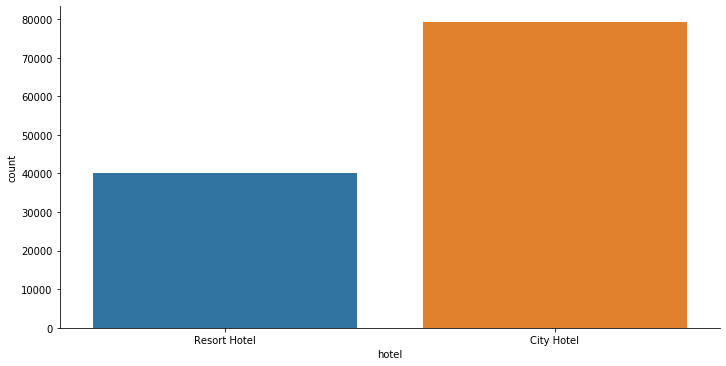

In [34]:
sns.factorplot(data=data, x="hotel", kind="count", size = 5, aspect = 2)

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


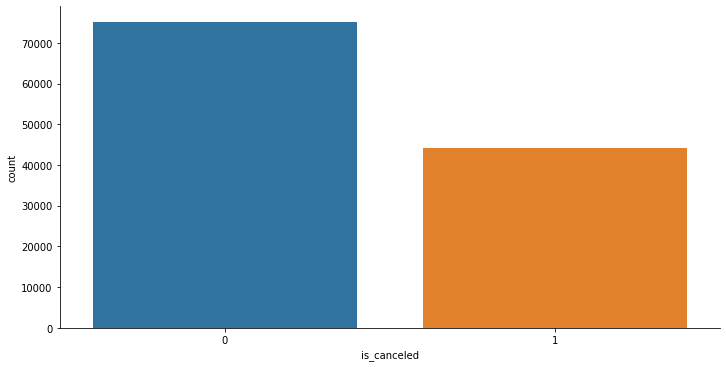

In [35]:
sns.factorplot(data=data, x="is_canceled", kind="count", size = 5, aspect = 2)

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


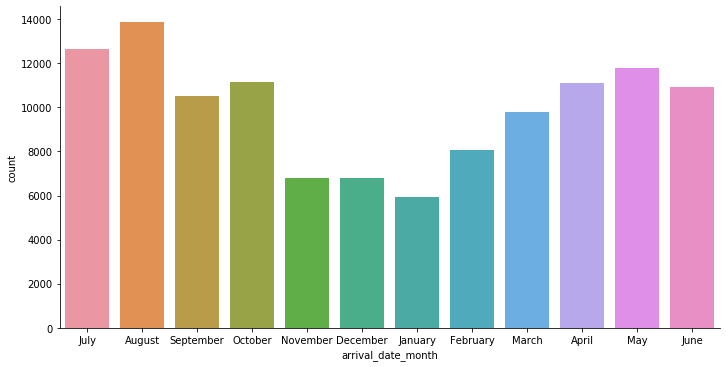

In [32]:
sns.factorplot(data=data, x="arrival_date_month", kind="count", size = 5, aspect = 2)

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


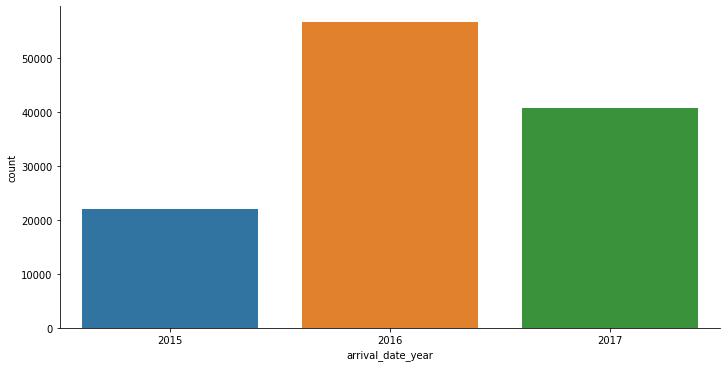

In [33]:
sns.factorplot(data=data, x="arrival_date_year", kind="count", size = 5, aspect = 2)

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


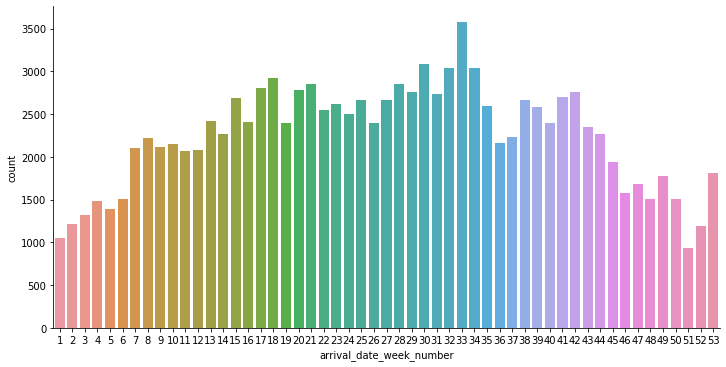

In [36]:
sns.factorplot(data=data, x="arrival_date_week_number", kind="count", size = 5, aspect = 2)

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


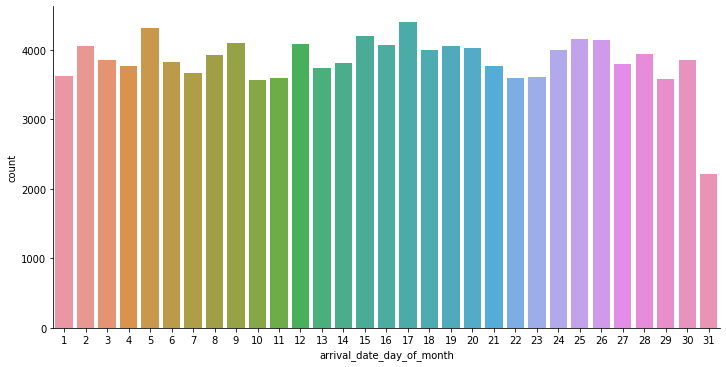

In [37]:
sns.factorplot(data=data, x="arrival_date_day_of_month", kind="count", size = 5, aspect = 2)

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


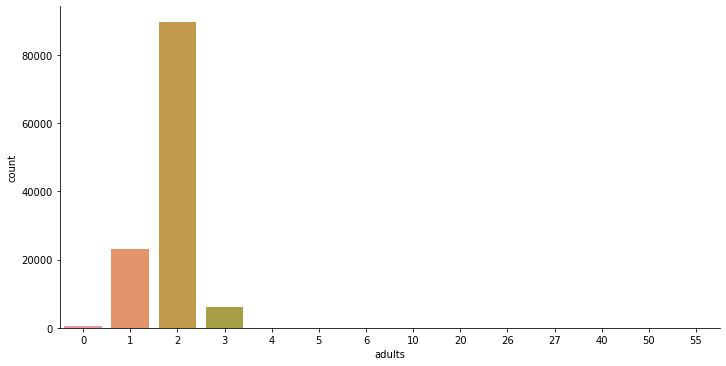

In [39]:
sns.factorplot(data=data, x="adults", kind="count", size = 5, aspect = 2)

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


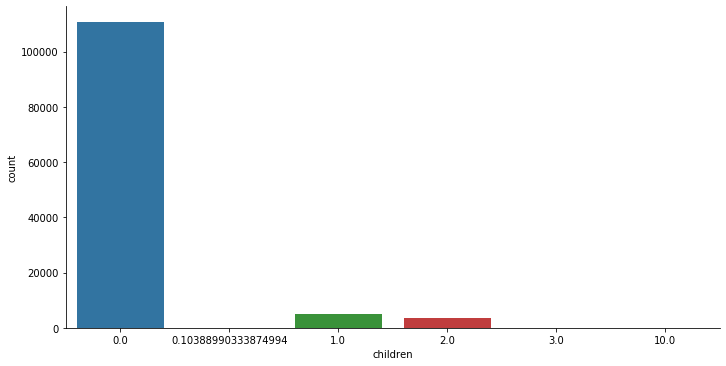

In [62]:
sns.factorplot(data=data, x="children", kind="count", size = 5, aspect = 2)

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


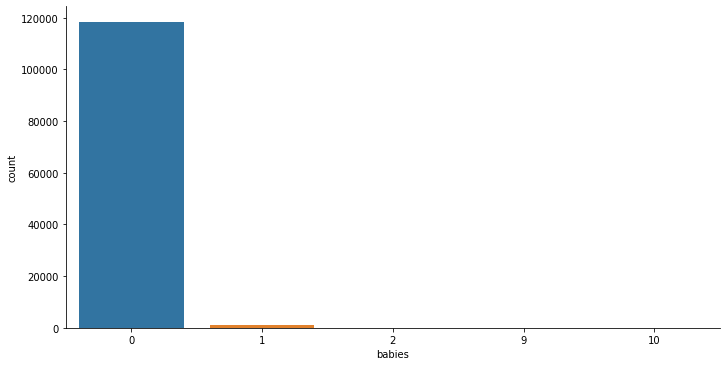

In [45]:
sns.factorplot(data=data, x="babies", kind="count", size = 5, aspect = 2)

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


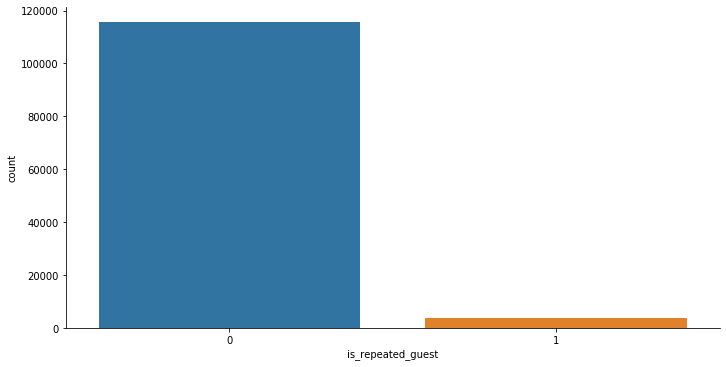

In [46]:
sns.factorplot(data=data, x="is_repeated_guest", kind="count", size = 5, aspect = 2)                 

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


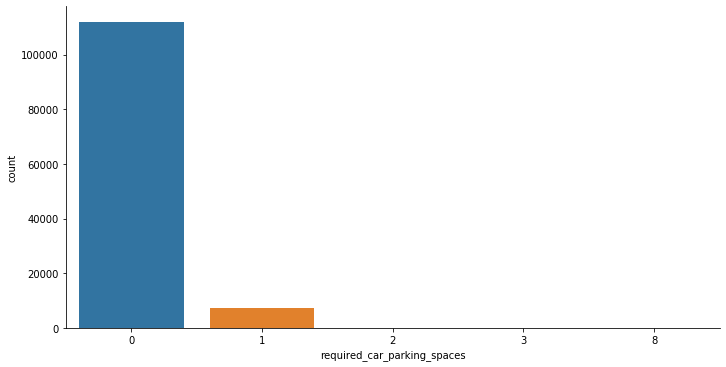

In [47]:
sns.factorplot(data=data, x="required_car_parking_spaces", kind="count", size = 5, aspect = 2)                        

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


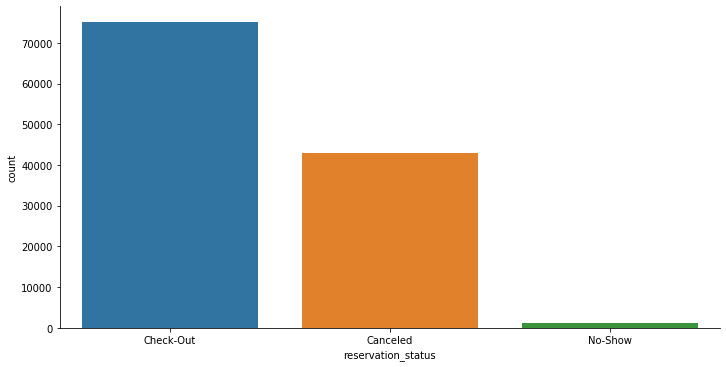

In [48]:
sns.factorplot(data=data, x="reservation_status", kind="count", size = 5, aspect = 2)                        

#### Lets do a short summary from our EDA
1. More requested are city hotels than resort hotels
2. A majority of the reservations have not been canceled but there are many that have been canceled
3. Least popular months for reservations are November, December and January and the most popular are July and August
4. 2016 was the year with the most reservations
5. 31st day of the month is the least popular for arriving at the reservation
6. The reservations mostly are consisted by 2 adults, 0 children and 0 babies
7. Mostly are new customers, rearly are repeated guests
8. Most of the guests do not require parking spaces
9. The majority of the reservations have been used and performed check out, there are very few that did not show at the hotel on the reservation, and there are many reservations that have been canceled

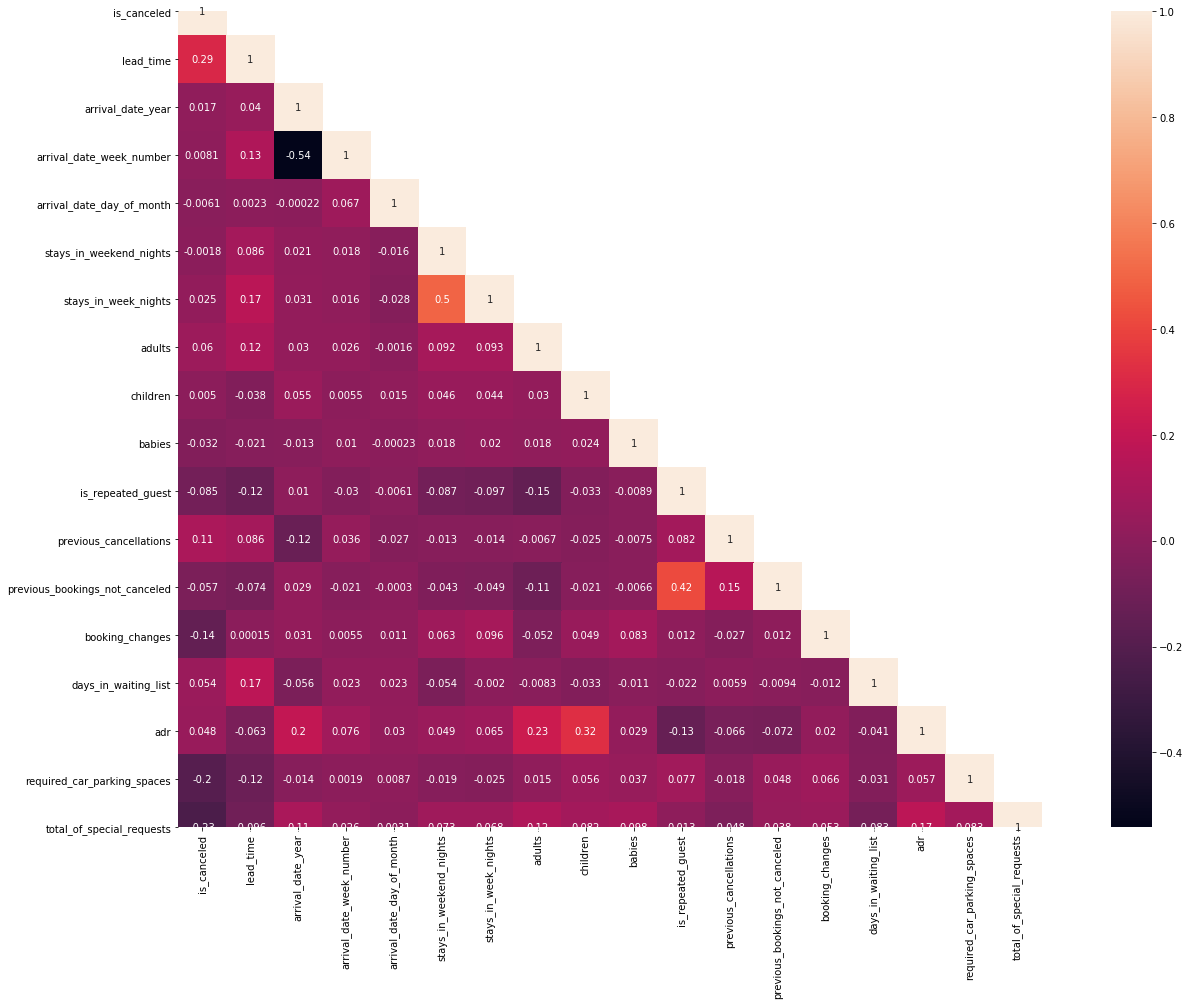

In [65]:
#Now lets see the correlation matrix to see how the variables are correlated among them selves
cor_mat=data[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)]=False
fig=plt.gcf()
fig.set_size_inches(25,15)
sns.heatmap(data=cor_mat, mask=mask, square=True, annot=True, cbar=True)

In [79]:
#Lets take just the categorical features
cat_df = data.drop(["is_canceled", "lead_time", "arrival_date_year","arrival_date_week_number","arrival_date_day_of_month", "stays_in_weekend_nights", "stays_in_week_nights", "adults","children", "babies", "is_repeated_guest", "previous_cancellations", "previous_bookings_not_canceled", "booking_changes", "days_in_waiting_list", "adr", "required_car_parking_spaces", "total_of_special_requests"], axis=1)

In [80]:
#Lets do the one hot encoding now on the categorical features
cat_df_one_hot = pd.get_dummies(cat_df)

In [81]:
cat_df_one_hot.head()

,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,...,reservation_status_date_2017-09-03,reservation_status_date_2017-09-04,reservation_status_date_2017-09-05,reservation_status_date_2017-09-06,reservation_status_date_2017-09-07,reservation_status_date_2017-09-08,reservation_status_date_2017-09-09,reservation_status_date_2017-09-10,reservation_status_date_2017-09-12,reservation_status_date_2017-09-14
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
#Lets take just the numerical features
num_df = data.drop(["hotel", "arrival_date_month","meal","market_segment", "distribution_channel","reserved_room_type","assigned_room_type", "deposit_type", "customer_type","reservation_status"],axis = 1)

In [88]:
num_df.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,0,342,2015,27,1,0,0,2,0.0,0,0,0,0,3,0,0.0,0,0,2015-07-01
1,0,737,2015,27,1,0,0,2,0.0,0,0,0,0,4,0,0.0,0,0,2015-07-01
2,0,7,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0,2015-07-02
3,0,13,2015,27,1,0,1,1,0.0,0,0,0,0,0,0,75.0,0,0,2015-07-02
4,0,14,2015,27,1,0,2,2,0.0,0,0,0,0,0,0,98.0,0,1,2015-07-03


In [91]:
#Concatenate the categorical and numerical features
df = pd.concat([cat_df_one_hot,num_df],axis=1)
df = df.drop(["reservation_status_date"], axis = 1)

In [92]:
#Scale the values of the features 
Scaler = StandardScaler()
Scaler.fit(df)
Scaled_data = Scaler.transform(df)

C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\cvveljanovski\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [140]:
# Using PCA transform the features and take features that will be useful since we have many features now
from sklearn.decomposition import PCA
pca = PCA(n_components = 4) #(or any number that you want0
pca.fit(Scaled_data)
X_pca = pca.transform(Scaled_data)

In [142]:
# Split the data in train and test
X = X_pca
Y = data.is_canceled
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=42)

In [143]:
#Define the Naive Bayes classifier algorithm
DT_model = DecisionTreeClassifier().fit(X_train, Y_train) 
#Predict
DT_predict = DT_model.predict(X_test)  

In [144]:
#See the performance of the prediction model
print(classification_report(Y_test, DT_predict))    # generate evaluation report of NB model

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22478
           1       0.99      0.99      0.99     13339

   micro avg       1.00      1.00      1.00     35817
   macro avg       1.00      1.00      1.00     35817
weighted avg       1.00      1.00      1.00     35817

